In [1]:
pip install -U ipykernel


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Cris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/117.2 kB ? eta -:--:--
   ---------- ----------------------------- 30.7/117.2 kB 1.3 MB/s eta 0:00:01
   --------------------------- ----------- 81.9/117.2 kB 919.0 kB/s eta 0:00:01
   -------------------------------------- - 112.6/117.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 112.6/117.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- 117.2/117.2 kB 526.8 kB/s eta 0:00:00
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 6.25.2
    Uninstalling ipykernel-6.25.2:
      Successfully uninstalled ipykernel-6.25.2


In [2]:
pip install pyserial


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: pyserial in c:\users\cris\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (3.5)




[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Cris\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
pip install matplotlib


In [29]:
import serial.tools.list_ports

ports = serial.tools.list_ports.comports()
print("Puertos disponibles:")
for port in ports:
    print(f"{port.device}")

# Configura el puerto encontrado, por ejemplo:
port = "COM3"
baudrate = 9600


Puertos disponibles:
COM3


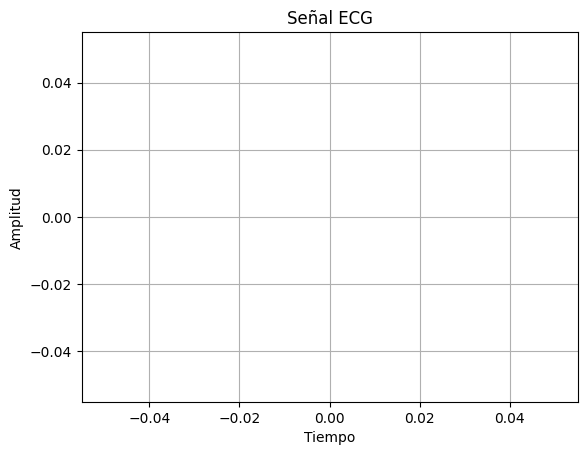

In [17]:
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tkinter import Tk, Frame, Label, Button
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Configuración inicial del puerto serie
SERIAL_PORT = "COM3"  # Cambia al puerto correcto de tu Arduino
BAUD_RATE = 9600      # Asegúrate de que coincida con la configuración de tu Arduino

# Clase para la Interfaz Gráfica
class ECGMonitor:
    def __init__(self, root):
        self.root = root
        self.root.title("Monitor ECG")
        self.root.geometry("800x600")

        # Crear un marco para el gráfico
        self.frame = Frame(root)
        self.frame.pack()

        # Etiqueta de encabezado
        self.label = Label(root, text="Monitor de ECG - Señal en Tiempo Real", font=("Arial", 16))
        self.label.pack()

        # Inicializar Matplotlib
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.frame)
        self.canvas.get_tk_widget().pack()

        self.line, = self.ax.plot([], [], lw=2)
        self.ax.set_title("Señal ECG")
        self.ax.set_xlabel("Tiempo")
        self.ax.set_ylabel("Amplitud")
        self.ax.grid(True)

        # Variables para graficar
        self.x_data = []
        self.y_data = []

        # Conectar al puerto serie
        try:
            self.serial_connection = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
        except Exception as e:
            self.label.config(text=f"Error: {e}")
            return

        # Botón para detener
        self.stop_button = Button(root, text="Detener", command=self.stop_monitoring, font=("Arial", 12))
        self.stop_button.pack()

        # Animación
        self.ani = animation.FuncAnimation(self.fig, self.update_plot, interval=100, blit=True)

    def update_plot(self, frame):
        try:
            if self.serial_connection.in_waiting > 0:
                data = self.serial_connection.readline().decode('utf-8').strip()
                if data.isdigit():
                    value = float(data)
                    self.x_data.append(len(self.x_data))
                    self.y_data.append(value)

                    # Limitar puntos en el gráfico para mantener fluidez
                    self.x_data = self.x_data[-100:]
                    self.y_data = self.y_data[-100:]

                    self.line.set_data(self.x_data, self.y_data)
                    self.ax.set_xlim(max(0, len(self.x_data) - 100), len(self.x_data))
                    self.ax.set_ylim(min(self.y_data) - 10, max(self.y_data) + 10)
        except Exception as e:
            self.label.config(text=f"Error de Lectura: {e}")
        return self.line,

    def stop_monitoring(self):
        self.serial_connection.close()
        self.root.destroy()

# Inicializar la aplicación
if __name__ == "__main__":
    root = Tk()
    app = ECGMonitor(root)
    root.mainloop()


C:\Users\Cris\AppData\Local\Temp\ipykernel_1900\3961895861.py:62: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = animation.FuncAnimation(self.fig, self.update_plot, interval=100, blit=True)


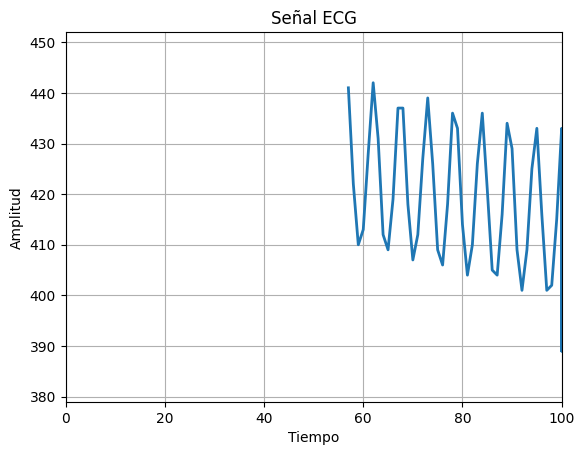

In [5]:
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tkinter import Tk, Frame, Label, Button
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time

# Configuración inicial del puerto serie
SERIAL_PORT = "COM3"  # Cambia al puerto correcto de tu Arduino
BAUD_RATE = 9600      # Asegúrate de que coincida con la configuración de tu Arduino

# Clase para la Interfaz Gráfica
class ECGMonitor:
    def __init__(self, root):
        self.root = root
        self.root.title("Monitor ECG")
        self.root.geometry("800x600")

        # Crear un marco para el gráfico
        self.frame = Frame(root)
        self.frame.pack()

        # Etiqueta de encabezado
        self.label = Label(root, text="Monitor de ECG - Señal en Tiempo Real", font=("Arial", 16))
        self.label.pack()

        # Etiqueta para mostrar los BPM
        self.bpm_label = Label(root, text="Latidos por minuto (BPM): 0", font=("Arial", 14))
        self.bpm_label.pack()

        # Inicializar Matplotlib
        self.fig, self.ax = plt.subplots()
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.frame)
        self.canvas.get_tk_widget().pack()

        self.line, = self.ax.plot([], [], lw=2)
        self.ax.set_title("Señal ECG")
        self.ax.set_xlabel("Tiempo")
        self.ax.set_ylabel("Amplitud")
        self.ax.grid(True)

        # Variables para graficar
        self.x_data = []
        self.y_data = []

        # Variables para detección de picos y cálculo de BPM
        self.last_peak_time = None
        self.peak_times = []

        # Conectar al puerto serie
        try:
            self.serial_connection = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
        except Exception as e:
            self.label.config(text=f"Error: {e}")
            return

        # Botón para detener
        self.stop_button = Button(root, text="Detener", command=self.stop_monitoring, font=("Arial", 12))
        self.stop_button.pack()

        # Animación
        self.ani = animation.FuncAnimation(self.fig, self.update_plot, interval=100, blit=True)

    def update_plot(self, frame):
        try:
            if self.serial_connection.in_waiting > 0:
                data = self.serial_connection.readline().decode('utf-8').strip()
                if data.isdigit():
                    value = float(data)
                    self.x_data.append(len(self.x_data))
                    self.y_data.append(value)

                    # Limitar puntos en el gráfico para mantener fluidez
                    self.x_data = self.x_data[-100:]
                    self.y_data = self.y_data[-100:]

                    self.line.set_data(self.x_data, self.y_data)
                    self.ax.set_xlim(max(0, len(self.x_data) - 100), len(self.x_data))
                    self.ax.set_ylim(min(self.y_data) - 10, max(self.y_data) + 10)

                    # Detección de picos
                    self.detect_peak(value)

        except Exception as e:
            self.label.config(text=f"Error de Lectura: {e}")
        return self.line,

    def detect_peak(self, value, threshold=500):
        """
        Detecta picos en la señal y calcula los BPM.
        """
        current_time = time.time()
        if value > threshold:  # Ajusta el umbral según la señal del ECG
            if self.last_peak_time is None or (current_time - self.last_peak_time) > 0.6:  # 0.6 s para evitar falsos picos
                self.last_peak_time = current_time
                self.peak_times.append(current_time)

                # Limitar la lista de picos para evitar sobrecarga
                self.peak_times = [t for t in self.peak_times if current_time - t <= 60]  # Últimos 60 segundos

                # Calcular BPM
                if len(self.peak_times) > 1:
                    rr_intervals = [self.peak_times[i] - self.peak_times[i - 1] for i in range(1, len(self.peak_times))]
                    average_rr = sum(rr_intervals) / len(rr_intervals)
                    bpm = 60 / average_rr
                    self.bpm_label.config(text=f"Latidos por minuto (BPM): {int(bpm)}")

    def stop_monitoring(self):
        self.serial_connection.close()
        self.root.destroy()

# Inicializar la aplicación
if __name__ == "__main__":
    root = Tk()
    app = ECGMonitor(root)
    root.mainloop()


C:\Users\Cris\AppData\Local\Temp\ipykernel_1900\1728640243.py:92: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = animation.FuncAnimation(self.fig, self.update_plot, interval=100, blit=True)
C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\Lib\tkinter\__init__.py:861: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from font(s) DejaVu Sans.
  func(*args)
C:\Users\Cris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 128147 (\N{BEATING HEART}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Cris\AppData\Local\Packages\PythonSoftwareFoundat

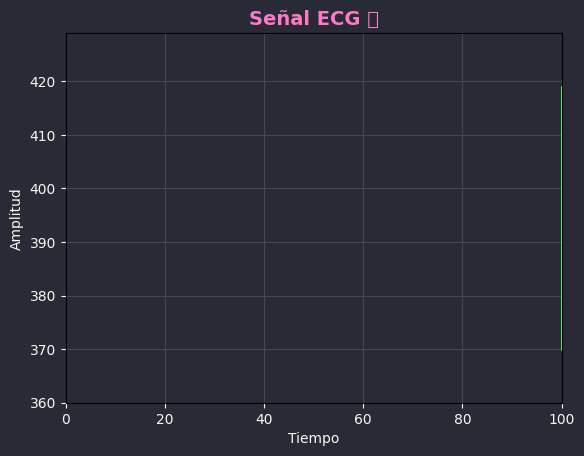

In [6]:
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tkinter import Tk, Frame, Label, Button, Canvas
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time

# Configuración inicial del puerto serie
SERIAL_PORT = "COM3"  # Cambia al puerto correcto de tu Arduino
BAUD_RATE = 9600      # Asegúrate de que coincida con la configuración de tu Arduino

# Clase para la Interfaz Gráfica
class ECGMonitor:
    def __init__(self, root):
        self.root = root
        self.root.title("❤️ Monitor de ECG con Estilo ❤️")
        self.root.geometry("900x700")
        self.root.configure(bg="#1e1e2f")  # Fondo oscuro

        # Crear un encabezado con emojis
        self.header = Label(
            root,
            text="🩺 Bienvenido al Monitor de ECG 🫀",
            font=("Arial", 20, "bold"),
            fg="#ff79c6",
            bg="#1e1e2f"
        )
        self.header.pack(pady=10)

        # Etiqueta para mostrar los BPM con un diseño llamativo
        self.bpm_label = Label(
            root,
            text="Latidos por minuto (BPM): 🧡 0",
            font=("Arial", 16, "bold"),
            fg="#8be9fd",
            bg="#1e1e2f"
        )
        self.bpm_label.pack(pady=10)

        # Crear un marco para el gráfico
        self.frame = Frame(root, bg="#1e1e2f")
        self.frame.pack()

        # Inicializar Matplotlib
        self.fig, self.ax = plt.subplots(facecolor="#282a36")
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.frame)
        self.canvas.get_tk_widget().pack()

        self.line, = self.ax.plot([], [], lw=2, color="#50fa7b")
        self.ax.set_facecolor("#282a36")
        self.ax.set_title("Señal ECG 💓", color="#ff79c6", fontsize=14, weight="bold")
        self.ax.set_xlabel("Tiempo", color="#f8f8f2")
        self.ax.set_ylabel("Amplitud", color="#f8f8f2")
        self.ax.tick_params(colors="#f8f8f2")
        self.ax.grid(color="#44475a")

        # Variables para graficar
        self.x_data = []
        self.y_data = []

        # Variables para detección de picos y cálculo de BPM
        self.last_peak_time = None
        self.peak_times = []

        # "Luces" para indicar BPM
        self.lights_canvas = Canvas(root, width=300, height=100, bg="#1e1e2f", highlightthickness=0)
        self.lights_canvas.pack(pady=10)
        self.light = self.lights_canvas.create_oval(100, 25, 200, 125, fill="#44475a", outline="#44475a")

        # Conectar al puerto serie
        try:
            self.serial_connection = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
        except Exception as e:
            self.header.config(text=f"Error: {e}")
            return

        # Botón para detener
        self.stop_button = Button(
            root,
            text="💔 Detener Monitor",
            command=self.stop_monitoring,
            font=("Arial", 12, "bold"),
            bg="#ff5555",
            fg="white",
            activebackground="#ff4444",
            activeforeground="white",
            borderwidth=0
        )
        self.stop_button.pack(pady=10)

        # Animación
        self.ani = animation.FuncAnimation(self.fig, self.update_plot, interval=100, blit=True)

    def update_plot(self, frame):
        try:
            if self.serial_connection.in_waiting > 0:
                data = self.serial_connection.readline().decode('utf-8').strip()
                if data.isdigit():
                    value = float(data)
                    self.x_data.append(len(self.x_data))
                    self.y_data.append(value)

                    # Limitar puntos en el gráfico para mantener fluidez
                    self.x_data = self.x_data[-100:]
                    self.y_data = self.y_data[-100:]

                    self.line.set_data(self.x_data, self.y_data)
                    self.ax.set_xlim(max(0, len(self.x_data) - 100), len(self.x_data))
                    self.ax.set_ylim(min(self.y_data) - 10, max(self.y_data) + 10)

                    # Detección de picos y cálculo de BPM
                    self.detect_peak(value)
        except Exception as e:
            self.header.config(text=f"Error de Lectura: {e}")
        return self.line,

    def detect_peak(self, value, threshold=500):
        """
        Detecta picos en la señal y calcula los BPM.
        """
        current_time = time.time()
        if value > threshold:  # Ajusta el umbral según la señal del ECG
            if self.last_peak_time is None or (current_time - self.last_peak_time) > 0.6:  # 0.6 s para evitar falsos picos
                self.last_peak_time = current_time
                self.peak_times.append(current_time)

                # Limitar la lista de picos para evitar sobrecarga
                self.peak_times = [t for t in self.peak_times if current_time - t <= 60]  # Últimos 60 segundos

                # Calcular BPM
                if len(self.peak_times) > 1:
                    rr_intervals = [self.peak_times[i] - self.peak_times[i - 1] for i in range(1, len(self.peak_times))]
                    average_rr = sum(rr_intervals) / len(rr_intervals)
                    bpm = 60 / average_rr
                    self.bpm_label.config(text=f"Latidos por minuto (BPM): 💓 {int(bpm)}")

                    # Cambiar color de la luz según BPM
                    if bpm < 60:
                        self.lights_canvas.itemconfig(self.light, fill="#50fa7b")  # Verde
                    elif 60 <= bpm <= 100:
                        self.lights_canvas.itemconfig(self.light, fill="#f1fa8c")  # Amarillo
                    else:
                        self.lights_canvas.itemconfig(self.light, fill="#ff5555")  # Rojo

    def stop_monitoring(self):
        self.serial_connection.close()
        self.root.destroy()

# Inicializar la aplicación
if __name__ == "__main__":
    root = Tk()
    app = ECGMonitor(root)
    root.mainloop()


C:\Users\Cris\AppData\Local\Temp\ipykernel_1900\2607140021.py:92: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  self.ani = animation.FuncAnimation(self.fig, self.update_plot, interval=100, blit=True)


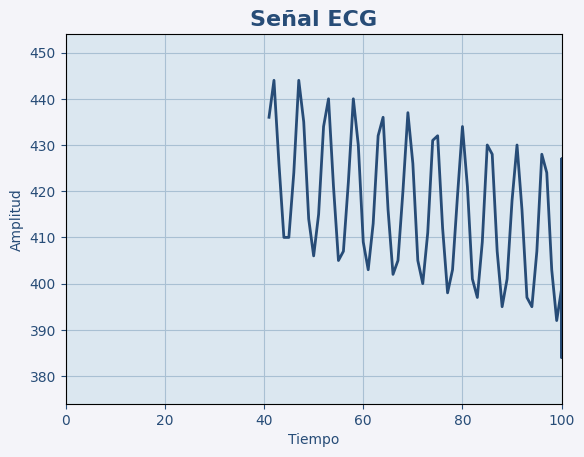

In [7]:
import serial
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from tkinter import Tk, Frame, Label, Button, Canvas
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import time

# Configuración inicial del puerto serie
SERIAL_PORT = "COM3"  # Cambia al puerto correcto de tu Arduino
BAUD_RATE = 9600      # Asegúrate de que coincida con la configuración de tu Arduino

# Clase para la Interfaz Gráfica
class ECGMonitor:
    def __init__(self, root):
        self.root = root
        self.root.title("Monitor de ECG")
        self.root.geometry("900x700")
        self.root.configure(bg="#f4f4f9")  # Fondo claro pastel

        # Crear un encabezado con estilo masculino
        self.header = Label(
            root,
            text="🩺 MONITOR DE ECG EN TIEMPO REAL",
            font=("Arial", 24, "bold"),
            fg="#274c77",
            bg="#f4f4f9"
        )
        self.header.pack(pady=15)

        # Etiqueta para mostrar los BPM
        self.bpm_label = Label(
            root,
            text="Latidos por minuto (BPM): 0",
            font=("Arial", 18, "bold"),
            fg="#6096ba",
            bg="#f4f4f9"
        )
        self.bpm_label.pack(pady=10)

        # Crear un marco para el gráfico
        self.frame = Frame(root, bg="#f4f4f9")
        self.frame.pack()

        # Inicializar Matplotlib
        self.fig, self.ax = plt.subplots(facecolor="#f4f4f9")
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.frame)
        self.canvas.get_tk_widget().pack()

        self.line, = self.ax.plot([], [], lw=2, color="#274c77")
        self.ax.set_facecolor("#dbe7f0")
        self.ax.set_title("Señal ECG", color="#274c77", fontsize=16, weight="bold")
        self.ax.set_xlabel("Tiempo", color="#274c77")
        self.ax.set_ylabel("Amplitud", color="#274c77")
        self.ax.tick_params(colors="#274c77")
        self.ax.grid(color="#a9c0d3")

        # Variables para graficar
        self.x_data = []
        self.y_data = []

        # Variables para detección de picos y cálculo de BPM
        self.last_peak_time = None
        self.peak_times = []

        # "Luz" para indicar BPM
        self.lights_canvas = Canvas(root, width=300, height=100, bg="#f4f4f9", highlightthickness=0)
        self.lights_canvas.pack(pady=10)
        self.light = self.lights_canvas.create_oval(100, 25, 200, 125, fill="#dbe7f0", outline="#dbe7f0")

        # Conectar al puerto serie
        try:
            self.serial_connection = serial.Serial(SERIAL_PORT, BAUD_RATE, timeout=1)
        except Exception as e:
            self.header.config(text=f"Error: {e}")
            return

        # Botón para detener
        self.stop_button = Button(
            root,
            text="Detener Monitor",
            command=self.stop_monitoring,
            font=("Arial", 14),
            bg="#6096ba",
            fg="white",
            activebackground="#274c77",
            activeforeground="white",
            borderwidth=0
        )
        self.stop_button.pack(pady=15)

        # Animación
        self.ani = animation.FuncAnimation(self.fig, self.update_plot, interval=100, blit=True)

    def update_plot(self, frame):
        try:
            if self.serial_connection.in_waiting > 0:
                data = self.serial_connection.readline().decode('utf-8').strip()
                if data.isdigit():
                    value = float(data)
                    self.x_data.append(len(self.x_data))
                    self.y_data.append(value)

                    # Limitar puntos en el gráfico para mantener fluidez
                    self.x_data = self.x_data[-100:]
                    self.y_data = self.y_data[-100:]

                    self.line.set_data(self.x_data, self.y_data)
                    self.ax.set_xlim(max(0, len(self.x_data) - 100), len(self.x_data))
                    self.ax.set_ylim(min(self.y_data) - 10, max(self.y_data) + 10)

                    # Detección de picos y cálculo de BPM
                    self.detect_peak(value)
        except Exception as e:
            self.header.config(text=f"Error de Lectura: {e}")
        return self.line,

    def detect_peak(self, value, threshold=500):
        """
        Detecta picos en la señal y calcula los BPM.
        """
        current_time = time.time()
        if value > threshold:  # Ajusta el umbral según la señal del ECG
            if self.last_peak_time is None or (current_time - self.last_peak_time) > 0.6:  # 0.6 s para evitar falsos picos
                self.last_peak_time = current_time
                self.peak_times.append(current_time)

                # Limitar la lista de picos para evitar sobrecarga
                self.peak_times = [t for t in self.peak_times if current_time - t <= 60]  # Últimos 60 segundos

                # Calcular BPM
                if len(self.peak_times) > 1:
                    rr_intervals = [self.peak_times[i] - self.peak_times[i - 1] for i in range(1, len(self.peak_times))]
                    average_rr = sum(rr_intervals) / len(rr_intervals)
                    bpm = 60 / average_rr
                    self.bpm_label.config(text=f"Latidos por minuto (BPM): {int(bpm)}")

                    # Cambiar color de la luz según BPM
                    if bpm < 60:
                        self.lights_canvas.itemconfig(self.light, fill="#b0c4de")  # Azul claro
                    elif 60 <= bpm <= 100:
                        self.lights_canvas.itemconfig(self.light, fill="#87ceeb")  # Celeste pastel
                    else:
                        self.lights_canvas.itemconfig(self.light, fill="#f08080")  # Rojo pastel

    def stop_monitoring(self):
        self.serial_connection.close()
        self.root.destroy()

# Inicializar la aplicación
if __name__ == "__main__":
    root = Tk()
    app = ECGMonitor(root)
    root.mainloop()


C:\Users\Cris\AppData\Local\Temp\ipykernel_1900\233617498.py:85: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani = animation.FuncAnimation(fig1, update_plot, interval=100)
C:\Users\Cris\AppData\Local\Temp\ipykernel_1900\233617498.py:86: UserWarning: frames=None which we can infer the length of, did not pass an explicit *save_count* and passed cache_frame_data=True.  To avoid a possibly unbounded cache, frame data caching has been disabled. To suppress this warning either pass `cache_frame_data=False` or `save_count=MAX_FRAMES`.
  ani2 = animation.FuncAnimation(fig2, update_plot, interval=100)


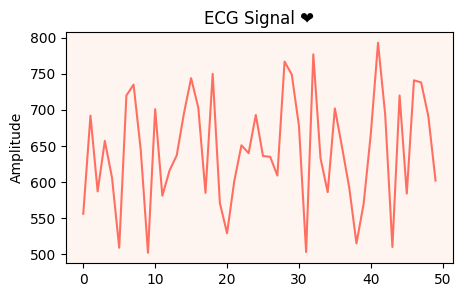

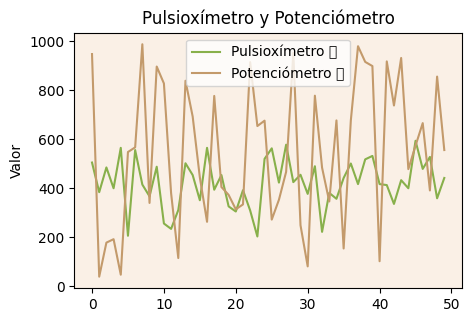

In [2]:
import tkinter as tk
from tkinter import ttk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random  # Simulación de datos

# Variables globales simuladas
ecg_data = []
pulseox_data = []
pot_data = []
bpm = 0

# Simular lecturas de sensores
def simulate_data():
    global bpm
    ecg_data.append(random.randint(500, 800))  # Señal ECG simulada
    pulseox_data.append(random.randint(200, 600))  # Pulsioxímetro simulado
    pot_data.append(random.randint(0, 1023))  # Potenciómetro simulado

    # Calcular BPM (simulado)
    if len(ecg_data) > 50:
        bpm = random.randint(60, 100)
        ecg_data.pop(0)
    if len(pulseox_data) > 50:
        pulseox_data.pop(0)
    if len(pot_data) > 50:
        pot_data.pop(0)

# Función para actualizar las gráficas
def update_plot(i):
    simulate_data()

    # Actualizar ECG
    ax1.clear()
    ax1.plot(ecg_data, color="#FF6F61")  # Rojo pastel
    ax1.set_title("ECG Signal ❤️")
    ax1.set_ylabel("Amplitude")
    ax1.set_facecolor("#FFF5F0")

    # Actualizar BPM
    bpm_label.config(text=f"Latidos por Minuto (BPM): {bpm}")

    # Actualizar pulsioxímetro y potenciómetro
    ax2.clear()
    ax2.plot(pulseox_data, label="Pulsioxímetro 🌡️", color="#88B04B")  # Verde pastel
    ax2.plot(pot_data, label="Potenciómetro 🎛️", color="#C39A6B")  # Café pastel
    ax2.set_title("Pulsioxímetro y Potenciómetro")
    ax2.set_ylabel("Valor")
    ax2.legend()
    ax2.set_facecolor("#FAF0E6")

# Crear ventana principal
root = tk.Tk()
root.title("Visualización de Señales - ECG y Pulsioxímetro 💻")

# Paleta de colores pastel
root.configure(bg="#FBEFEF")

# Crear frames
frame_ecg = ttk.LabelFrame(root, text="ECG 📈", padding=(10, 10))
frame_ecg.pack(side=tk.LEFT, fill=tk.BOTH, expand=True, padx=10, pady=10)

frame_pulseox = ttk.LabelFrame(root, text="Pulsioxímetro y Potenciómetro 📊", padding=(10, 10))
frame_pulseox.pack(side=tk.RIGHT, fill=tk.BOTH, expand=True, padx=10, pady=10)

# Configurar estilos
style = ttk.Style()
style.configure("TLabelframe", background="#FBEFEF", font=("Arial", 12, "bold"))
style.configure("TLabelframe.Label", background="#FBEFEF", font=("Arial", 14, "bold"))

# Figura para ECG
fig1, ax1 = plt.subplots(figsize=(5, 3))
canvas1 = FigureCanvasTkAgg(fig1, frame_ecg)
canvas1.get_tk_widget().pack(fill=tk.BOTH, expand=True)
bpm_label = ttk.Label(frame_ecg, text="Latidos por Minuto (BPM): 0", background="#FBEFEF", font=("Arial", 12))
bpm_label.pack(pady=5)

# Figura para pulsioxímetro y potenciómetro
fig2, ax2 = plt.subplots(figsize=(5, 3))
canvas2 = FigureCanvasTkAgg(fig2, frame_pulseox)
canvas2.get_tk_widget().pack(fill=tk.BOTH, expand=True)

# Animar gráficos
ani = animation.FuncAnimation(fig1, update_plot, interval=100)
ani2 = animation.FuncAnimation(fig2, update_plot, interval=100)

# Ejecutar aplicación
root.mainloop()
